Figure S1-B in Mahdavi et al. (2021) Environmental Pollution (in the Supplemental Information (SI))

This figure compares particle size distribution (PSD) measured by airborne samples and QFF in the studied home.

Plot type: Line plot

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import container
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Pre-processing and data preparation

df = pd.read_csv(backslash_correct(r'C:\PhD Research\QFF Evaluation\Raw\eff_summary.csv'))
df = df[(df['bin'] != 1) & (df['bin'] != 2.5) & (df['bin'] != 10)]
df = df[(df['site'] == 1) & (df['filter_type'] == 3)]

df[['mu_filter_eff', 'mu_total_eff']] = df[['mu_filter_eff', 'mu_total_eff']].pow(2)

df = df.groupby('bin', as_index = False).agg({'filter_eff' : 'mean',
                            'total_eff' : 'mean',
                            'mu_filter_eff' : 'sum',
                            'mu_total_eff' : 'sum'})

df[['mu_filter_eff', 'mu_total_eff']] = np.sqrt(df[['mu_filter_eff', 'mu_total_eff']])

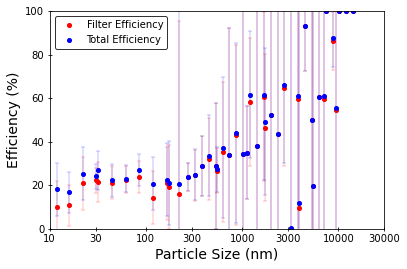

In [3]:
### Figure

plt.figure()
plt.errorbar(df['bin'], df['filter_eff'], yerr = [df['mu_filter_eff'], df['mu_filter_eff']], xerr = None, 
             capsize = 2, lw = 0, c = "r", ecolor = 'r', elinewidth = 0.25, capthick = 0.25, label = 'Filter Efficiency', marker = 'o', markersize = 4)

plt.errorbar(df['bin'], df['total_eff'], yerr = [df['mu_filter_eff'], df['mu_filter_eff']], xerr = None, 
             capsize = 2, lw = 0, c = "b", ecolor = 'b', elinewidth = 0.25, capthick = 0.25, label = 'Total Efficiency', marker = 'o', markersize = 4)

plt.xscale('log')

a = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xlim(10, 30000)
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (nm)', size = 14)

plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, step=20))
plt.ylabel('Efficiency (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:

    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black')

plt.savefig(r'C:/PhD Research/QFF Evaluation/Processed/plots/Figure_s1b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code